### Final Capstone: Twitter Sentiment Alaysis

#### An election for president of the United States happens every four years on the first Tuesday after the first Monday in November. Candidates are elected directly by popular vote.¶
I performed some data exploration and visualization in this notebook using data from Twitter to gather the candidates popularity and the chances for them to win the race. This analysis also provides customer sentiment towards polical party and how to connect with voters.
Data Source: Twitter.
The intended audience of this presentation is any candidate that have decided to run for the election and wanted insights of himself and other candidates. This information can lead the candicate to invest their time and money where it is required.
The notebook work flow is as follows:
- Framing the question
- Loading dataset to pandas dataframe
- Data exploration and cleaning
- Insights extraction
- modeling
- visualizations
- Conclusion

### Use Twitter API keys

In [1]:
ACCESS_TOKEN = "2579829499-HkSx8z7ToV0rPouv27z4HwFRFIdJM0f57GUgdzv"
ACCESS_TOKEN_SECRET = "w5LhkcI3FdlZaK7cKFOCR9hRXmqkCDWbl3uPJVAE6n1UL"
CONSUMER_KEY = "kfYddvhVO6vRrn1yNG4N6C6iA"
CONSUMER_SECRET = "Jlj9vj1M3PYJ3I1CVM9ZtYeuZxI1jS8DUWoTzFRY43mGimMWVi"

In [2]:
import sys
print(sys.version)

3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]


In [3]:
import twitter_credentials

##### Import the necessary libraries and authenticate for data streamin below

In [5]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import API
from tweepy import cursor
import numpy as np

 

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth)

public_tweets = api.home_timeline()
#for tweet in public_tweets:
    #print(tweet.text)

### Tweeter Authentication

In [6]:
# Twitter AUthenticator
class TwitterAuthenticator ():
    def  authenticate_twitter_app(self):
        auth = OAuthHandler(twitter_credentials.CONSUMER_KEY, twitter_credentials.CONSUMER_SECRET)
        auth.set_access_token(twitter_credentials.ACCESS_TOKEN, twitter_credentials.ACCESS_TOKEN_SECRET)
        return auth
        

### Stream the data

In [7]:
class TwitterStreamer():
    """
    Class for streaming and processing live tweets.
    """
    def __init__(self):
        self.twitter_authenticator = TwitterAuthenticator()

    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        # This handles Twitter authetification and the connection to Twitter Streaming API
        listener = TwittertListener(fetched_tweets_filename)
        auth = self.twitter_authenticator.authenticate_twitter_app()
        stream = Stream(auth, listener)

        # This line filter Twitter Streams to capture data by the keywords: 
        stream.filter(track=hash_tag_list)

### To print the streamed tweets

In [ ]:
from tweepy.streaming import StreamListener
# # # # TWITTER STREAM LISTENER # # # #
class TwittertListener(StreamListener):
    """
    This is a basic listener that just prints received tweets to stdout.
    """
    def __init__(self, fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename

    def on_data(self, data):
        try:
            #print(data) -to eliminate the tweets print on the notebook
            with open(self.fetched_tweets_filename, 'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True
          

    def on_error(self, status):
        print(status)

#### Use keywords such as candidate name and their tweeter handle to stream data. We can also use product names and any other topic of interest to gather the related tweets here. The tweets will be collected and saved to JSON file format

In [ ]:
#hash_tag_list = ["CELSIUSDrink", "@CelsiusOfficial"] - to stream sentiment data on other products
hash_tag_list = ["Pete Buttigieg","@PeteButtigieg"]
#fetched_tweets_filename = "tweets.txt"
fetched_tweets_filename = "tweetPete.json"

twitter_streamer = TwitterStreamer()
twitter_streamer.stream_tweets(fetched_tweets_filename, hash_tag_list)


#### Note: Loading JSON file bigger than 90,000 KB cause memory error on my laptop. To be fair, I used the same JSON file size at 90,000KB for all the candidates in this project. If the file is too large, ddjust the JSON file to required size with Git Bash.

In [17]:
# create dataframe
import pandas as pd
df= pd.read_json("tweetDonald.json", encoding="utf8", lines = True)

#df = pd.read_json(open(tweetDTrump.json","r", encoding='utf',lines=True)

In [18]:
type(df)

pandas.core.frame.DataFrame

In [19]:
df.shape

(11404, 36)

### Explore and clean the data

In [20]:
df.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,entities,favorited,retweeted,filter_level,lang,timestamp_ms,extended_tweet,possibly_sensitive,extended_entities,display_text_range
0,2020-02-17 13:35:26+00:00,1229398952388243456,1229398952388243456,"RT @lendysthomas: Señores, vamos a recoger din...","<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,es,2020-02-17 13:35:26.034,NaN,NaN,NaN,NaN
1,2020-02-17 13:35:26+00:00,1229398953323618304,1229398953323618304,"RT @KapeciaResists: @realDonaldTrump Now, if y...","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,NaN,...,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,2020-02-17 13:35:26.257,NaN,NaN,NaN,NaN
2,2020-02-17 13:35:27+00:00,1229398956758753281,1229398956758753280,How did we get here? From a more or less progr...,"<a href=""http://twitter.com/download/android"" ...",True,NaN,NaN,NaN,NaN,...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,low,en,2020-02-17 13:35:27.076,{'full_text': 'How did we get here? From a mor...,0.0,NaN,NaN
3,2020-02-17 13:35:27+00:00,1229398957450760194,1229398957450760192,RT @WalshFreedom: There are more people in thi...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,2020-02-17 13:35:27.241,NaN,NaN,NaN,NaN
4,2020-02-17 13:35:27+00:00,1229398959078215682,1229398959078215680,RT @neljulger: #BuenLunes pueblo generoso y Gu...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,NaN,NaN,NaN,NaN,...,"{'hashtags': [{'text': 'BuenLunes', 'indices':...",False,False,low,es,2020-02-17 13:35:27.629,NaN,NaN,NaN,NaN


In [21]:
# Clean the data in text column
# Selecting only the text column
# Removing punctuations
df_wordclean = df.iloc[:,3:4]
df_wordclean.replace("[^a-zA-Z]"," ",regex=True, inplace=True)


In [22]:
# verify only alphabets are left in text column
df_wordclean.head()

,text
0,RT lendysthomas Se ores vamos a recoger din...
1,RT KapeciaResists realDonaldTrump Now if y...
2,How did we get here From a more or less progr...
3,RT WalshFreedom There are more people in thi...
4,RT neljulger BuenLunes pueblo generoso y Gu...


### Convert the tweets in text column to lowercase

In [23]:
df_wordclean["text"]=df_wordclean["text"].str.lower()

In [24]:
# verify all text has been converted to lowercase
df_wordclean.head()

,text
0,rt lendysthomas se ores vamos a recoger din...
1,rt kapeciaresists realdonaldtrump now if y...
2,how did we get here from a more or less progr...
3,rt walshfreedom there are more people in thi...
4,rt neljulger buenlunes pueblo generoso y gu...


### Let's plot a histogram to visualize the most common words found in the text column

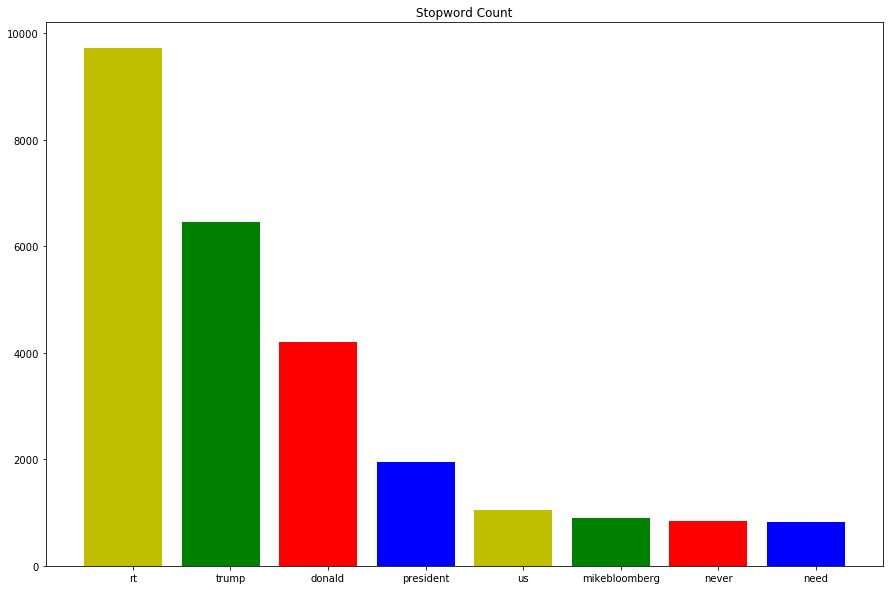

In [25]:
# plot histogram for word count - pre-word clean
# Transforming text to number
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
# Use NLTK to clean-up the stopwords
import nltk
from nltk.corpus import stopwords
sw = set(stopwords.words('english'))
# creating word counter for plotting
word_counts=Counter()
for i in range(len(df_wordclean['text'])):
        if(isinstance(df_wordclean['text'][i],float)): # this line to skip any float values
            #print(df_wordclean['text'][i]) # to print what the values is
            continue
        for word in df_wordclean['text'][i].split(" "):
            if word in sw:
                                            continue
            if word in ('','RT', 'realDonaldTrump', 'Trump', 'I', 'Donald', 'The', 'Vindman''PeteButtigieg','https','co','This'):
                continue
            word_counts[word] += 1
            


labels=[]
values=[]
for label, value in list(word_counts.most_common(8)):
    labels.append(label)
    values.append(value)

fig,ax = plt.subplots(figsize = (15,10))
indexes = np.arange(len(labels))
width = 1
plt.title("Stopword Count")
plt.bar(indexes, values, width= 0.8, color = 'ygrb')
plt.xticks(indexes + width * 0.1, labels)
plt.savefig("img/Word_count_Bernie_Sanders.png", bbox_inches='tight', pad_inches=2)
plt.show()

In [29]:
# drop rows with any na, if any
df_wordclean = df_wordclean.dropna()

In [30]:
# if any rows with na dropped, the row total will be lower than previous df.shape
df_wordclean.shape

(11404, 1)

In [31]:
print(labels)

['rt', 'trump', 'donald', 'president', 'us', 'mikebloomberg', 'never', 'need']


In [32]:
# total frequency of most common words
print(values)

[9717, 6445, 4201, 1951, 1038, 890, 844, 827]


### Use Text Blob to obtain a new column, polarity - sentiment. We also will get the latitude & longitude and plot it.

In [33]:
# TextBlob: textblob is the python library for processing textual data.
import numpy as np
from textblob import TextBlob
import re
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())

In [34]:
# data processing to get the lat & long
bboxes = []
lats = []
lons = []
polarityArr = []
messages = []
for index,row in df.iterrows():
    if(isinstance(row['text'],float)): # this line to skip any float values
            continue
    if(row.place is None):
            continue
    bbox = np.array(row.place['bounding_box']['coordinates'][0])
    lat = bbox.mean(axis=0).tolist()[1]
    lon = bbox.mean(axis=0).tolist()[0]
    # to remove points outside US

    if not (lat > 25.79 and  lat < 49.50 and lon > -129.73 and lon < -66.44):
        continue
    bboxes.append(bbox)
    lats.append(lat)
    lons.append(lon)
    analysis = TextBlob((row['text']))
    messages.append(row['text'])
    polarity = analysis.sentiment.polarity
    
     # set sentiment 
    if analysis.sentiment.polarity > 0: 
            polarityArr.append('positive')
    #elif analysis.sentiment.polarity == 0: 
            #polarityArr.append('neutral')
    else: 
            polarityArr.append('negative')
   

In [35]:
print(lats)

[36.0188045, 39.960701, 39.9946835, 37.9856605, 29.574387, 27.698681999999998, 43.075570500000005, 29.838495, 32.810012, 39.9946835, 43.260695500000004, 35.4828435, 33.7671945, 40.7648865, 40.1843485, 29.0923355, 38.8759335, 41.0550135, 46.8791, 35.9952715, 39.7795625, 45.517652, 36.0609645, 41.557321, 28.0424895, 43.629311, 25.825643499999998, 44.2397945, 42.1922575, 34.1090235, 38.3045585, 35.935017, 44.9706105, 33.4057545, 43.030981, 35.222301, 30.275994500000003, 43.555244, 27.698681999999998, 33.526322, 33.639340000000004, 30.0386925, 27.698681999999998, 47.273022, 40.8593015, 36.200008, 42.9488405, 40.944567500000005, 42.4798095]


In [36]:
print(lons)

[-115.23443549999999, -82.71838149999999, -82.985772, -121.79644400000001, -97.97377900000001, -83.804475, -78.88398000000001, -95.44648649999999, -117.104989, -82.985772, -79.9135205, -97.552161, -84.433106, -80.322378, -75.13786200000001, -81.0232725, -94.52555100000001, -83.6339035, -114.03115, -86.7779855, -86.1429225, -122.770673, -115.135165, -71.497913, -82.372728, -79.2725695, -80.369153, -77.354506, -88.3429735, -81.19485, -92.4367735, -86.8511765, -93.2620465, -111.7375655, -75.980854, -97.4451735, -98.870276, -79.616073, -83.804475, -82.095304, -111.85839849999999, -99.1620375, -83.804475, -120.88248199999998, -79.975058, -86.79154899999999, -81.2487865, -73.86085700000001, -83.260274]


In [37]:
print(polarityArr)

['positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive']


#### We now have lattidues, logitudes and sentiment associated to it. We can use this to plot on the map to see the distribution for each candidates.

In [38]:
# create a new dataframe with lat, lon & polarity in dictionary
d = {'text':messages, 'latitude':lats, 'longitude':lons, 'sentiment':polarityArr}

In [39]:
# create a df from this dict
df_geomap = pd.DataFrame(d) 

In [40]:
# count positive & negative tweets only
df_geomap[df_geomap['sentiment']=='positive'].count()

text         17
latitude     17
longitude    17
sentiment    17
dtype: int64

In [41]:
# count positive & negative tweets only
df_geomap[df_geomap['sentiment']=='negative'].count()

text         32
latitude     32
longitude    32
sentiment    32
dtype: int64

In [42]:
# count positive & negative tweets, it should add up to negative & positive totals above
df_geomap.count()

text         49
latitude     49
longitude    49
sentiment    49
dtype: int64

### The negative sentiments is more than positive sentiments. We will do something about this later before modelling. For now, let's plot the sentiment.

In [43]:
# verify the lat & lon columns are in the df_goe_map dataframe
df_geomap.head()

,text,latitude,longitude,sentiment
0,Notice nun of them have a real plan to help Am...,36.018805,-115.234435,positive
1,@_Gun_Lover You support Donald 'ban the bump s...,39.960701,-82.718381,negative
2,“I talked to somebody from the Bloomberg campa...,39.994684,-82.985772,negative
3,“F**k Donald Trump. We have a voice too. We wi...,37.985661,-121.796444,negative
4,@realDonaldTrump You are the man President Don...,29.574387,-97.973779,negative


In [44]:
# Now we ready to plot
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes
import matplotlib.pyplot as plt

In [45]:
# Reading the US shape file
#street_map = gpd.read_file('C:\Thinkful\Assignments\Final_Project_2\FullYoutubeVideo\cb_2018_us_county_20m\cb_2018_us_county_20m.shp')
street_map = gpd.read_file('C:\Thinkful\Assignments\Module 44 Final Capstone\Master\cb_2018_us_county_20m\cb_2018_us_county_20m.shp')

In [46]:
# now need to create a geo pandas df
geometry = [Point(xy) for xy in zip(df_geomap['longitude'],df_geomap['latitude'])]

In [47]:
# setting up the coordinate reference 
# spatial references, latest version is epsg 4326
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df_geomap, crs = crs, geometry = geometry)

In [48]:
# with lat, lon & geometry, we can plot it
geo_df.head()

,text,latitude,longitude,sentiment,geometry
0,Notice nun of them have a real plan to help Am...,36.018805,-115.234435,positive,POINT (-115.23444 36.01880)
1,@_Gun_Lover You support Donald 'ban the bump s...,39.960701,-82.718381,negative,POINT (-82.71838 39.96070)
2,“I talked to somebody from the Bloomberg campa...,39.994684,-82.985772,negative,POINT (-82.98577 39.99468)
3,“F**k Donald Trump. We have a voice too. We wi...,37.985661,-121.796444,negative,POINT (-121.79644 37.98566)
4,@realDonaldTrump You are the man President Don...,29.574387,-97.973779,negative,POINT (-97.97378 29.57439)


### Use Shapely to plot the latitude & longitude

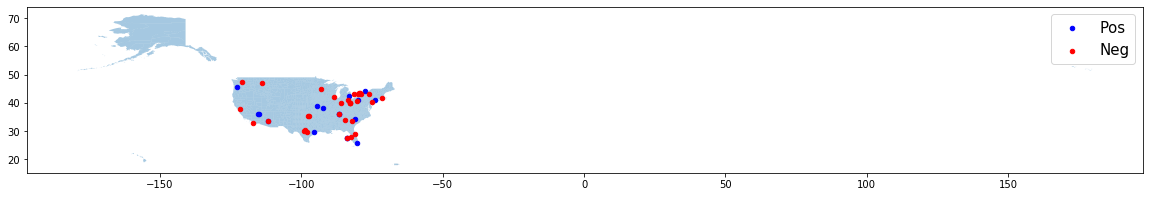

In [49]:
# use shapely by US County
fig,ax = plt.subplots(figsize = (20,20))
street_map.plot(ax=ax, alpha=0.4)
geo_df[geo_df['sentiment']=='positive'].plot(ax=ax, markersize = 20, color = "blue", marker ="o", label = "Pos")
geo_df[geo_df['sentiment']=='negative'].plot(ax=ax, markersize = 20, color = "red", marker ="o", label = "Neg")

plt.legend(prop = {'size': 15})

In [50]:
#plot for visualization: based on lat & lon and polarity
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon

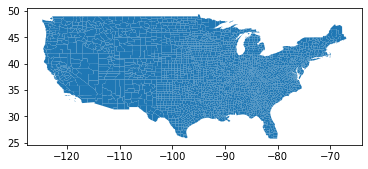

In [51]:
from matplotlib import pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import rtree

# bounding box for continental US
bbox = [-129.7265625,25.799891182088334,-66.4453125,49.49667452747045]

# Rectangles from bbox
p1 = Point(bbox[0], bbox[3])
p2 = Point(bbox[2], bbox[3])
p3 = Point(bbox[2], bbox[1])
p4 = Point(bbox[0], bbox[1])

# x-coor & y-coor

np1 = (p1.coords.xy[0][0], p1.coords.xy[1][0])
np2 = (p2.coords.xy[0][0], p2.coords.xy[1][0])
np3 = (p3.coords.xy[0][0], p3.coords.xy[1][0])
np4 = (p4.coords.xy[0][0], p4.coords.xy[1][0])

# define polygon from the points above
bb_polygon = Polygon([np1, np2, np3, np4])

# make a df
df2 = gpd.GeoDataFrame(gpd.GeoSeries(bb_polygon), columns=['geometry'])

# overlay
intersections2 = gpd.overlay(df2, street_map, how='intersection')
#intersections3 = gpd.overlay(geo_df,df2, how='intersection')

plt.ion()
intersections2.plot()

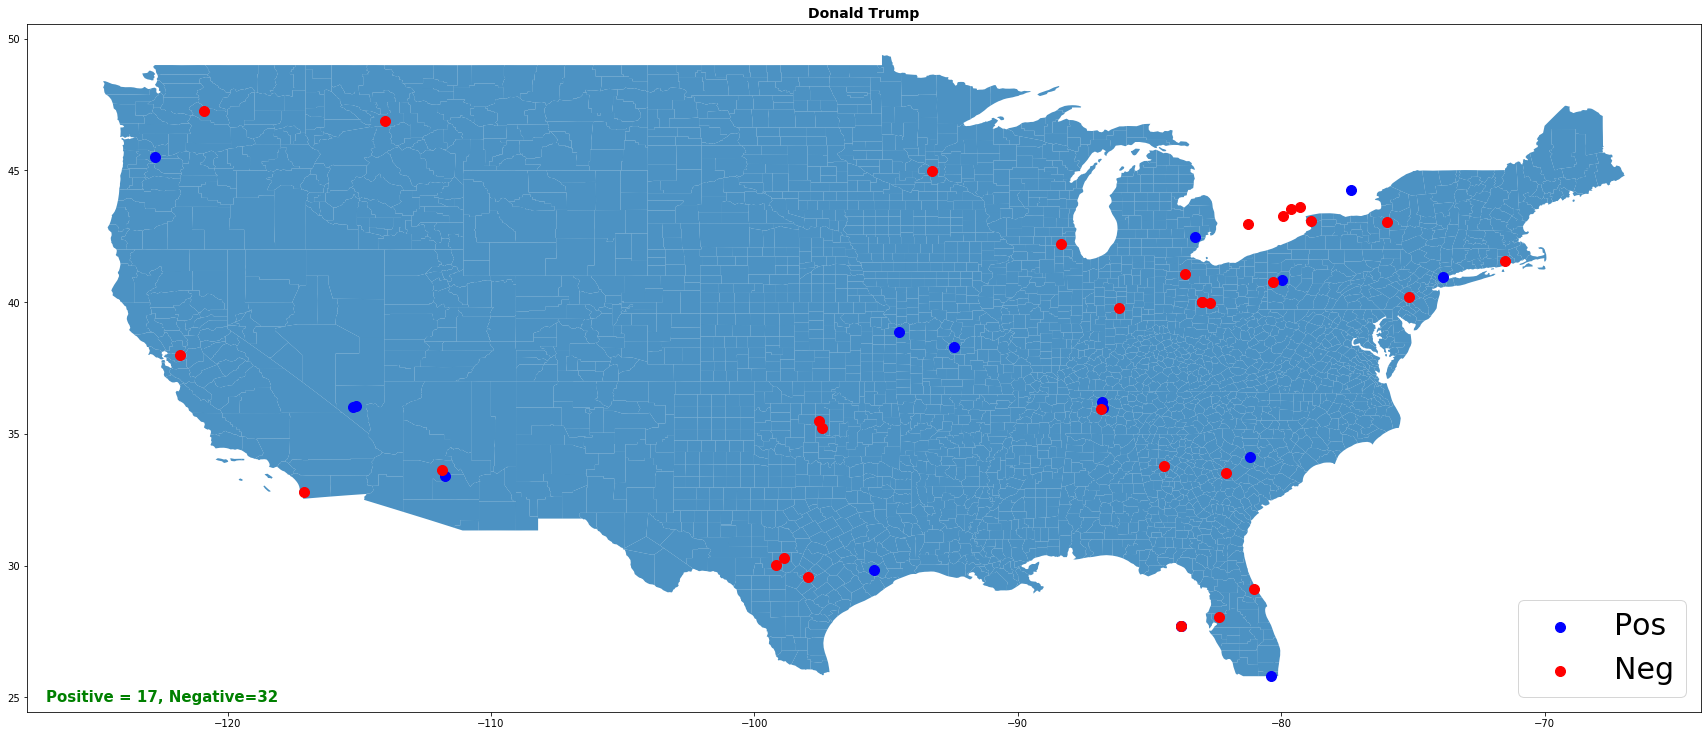

In [52]:
fig,ax = plt.subplots(figsize = (30,30))
intersections2.plot(ax=ax, alpha=0.8)
plt.title('Donald Trump', fontsize=14, fontweight='bold')
ax.text(0.15, 0.01, 'Positive = '+ str(geo_df[geo_df['sentiment']=='positive']['sentiment'].count()) + ', Negative='+ str(geo_df[geo_df['sentiment']=='negative']['sentiment'].count()),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15, fontweight='bold')
geo_df[geo_df['sentiment']=='positive'].plot(ax=ax, markersize = 100, color = "blue", marker ="o", label = "Pos")
geo_df[geo_df['sentiment']=='negative'].plot(ax=ax, markersize = 100, color = "red", marker ="o", label = "Neg")

plt.legend(prop = {'size': 30}, loc='lower right')
plt.savefig("img/Sentiment_TextBlob_Donald_Trump.png", bbox_inches='tight', pad_inches=2)

### So far, we were able to add coordinates to sentiment and plot it on the map. Next, we will use modelling techniques to train & predict the dataset and plot it again.

### First Model: Naive Bayes

In [53]:
# import the necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
MultinomialNB = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

c:\program files\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


### The following train & test dataset was obtained from : https://datahack.analyticsvidhya.com/contest/practice-problem-twitter-sentiment-analysis/

In [54]:
train = pd.read_csv('train.csv')
print("Training Set:"% train.columns, train.shape, len(train))
test = pd.read_csv('test_tweets.csv')
print("Test Set:"% test.columns, test.shape, len(test))

Training Set: (31962, 3) 31962
Test Set: (17197, 2) 17197


#### Based on the test & train set above, the data is imbalance. We have to do something about that.

In [55]:
# a function to clean the data with regular expression
import re
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower() # lowercase
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem)) #removing unwanted characters 
    #df[text_field]= df[text_field].apply(lambda elem: ' '.join([item for item in elem.split() if item not in sw])) # removing stopwords

    return df
test_clean = clean_text(test, "tweet")
train_clean = clean_text(train, "tweet")

#### Handling imbalanced classes: upsampling - with replacement, from the minority class until the class is the same size as the majority.

In [56]:
from sklearn.utils import resample
train_majority = train_clean[train_clean.label==0]
train_minority = train_clean[train_clean.label==1]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['label'].value_counts()

1    29720
0    29720
Name: label, dtype: int64

#### Now it is balanced. We are ready to test, train and model it.

In [57]:
# splitting the training data into a test and training set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_upsampled['tweet'],                                    
train_upsampled['label'],random_state = 0)

In [58]:
#  fit the model to the training data and computes the F1 score.
model = MultinomialNB.fit(X_train, y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test, y_predict)

0.9526677577741407

In [59]:
print('accuracy score: ',accuracy_score(y_test, y_predict))
print('\n')
print('confusion matrix: \n',confusion_matrix(y_test,y_predict))
print('\n')
print(classification_report(y_test, y_predict))

accuracy score:  0.9513458950201884


confusion matrix: 
 [[6861  629]
 [  94 7276]]


              precision    recall  f1-score   support

           0       0.99      0.92      0.95      7490
           1       0.92      0.99      0.95      7370

    accuracy                           0.95     14860
   macro avg       0.95      0.95      0.95     14860
weighted avg       0.95      0.95      0.95     14860



### Wow! 95% is very good. But we need to verify this result with another model later.

#### Let's get the sentiment and coordinates associated to it

In [60]:
geo_df.head()

,text,latitude,longitude,sentiment,geometry
0,Notice nun of them have a real plan to help Am...,36.018805,-115.234435,positive,POINT (-115.23444 36.01880)
1,@_Gun_Lover You support Donald 'ban the bump s...,39.960701,-82.718381,negative,POINT (-82.71838 39.96070)
2,“I talked to somebody from the Bloomberg campa...,39.994684,-82.985772,negative,POINT (-82.98577 39.99468)
3,“F**k Donald Trump. We have a voice too. We wi...,37.985661,-121.796444,negative,POINT (-121.79644 37.98566)
4,@realDonaldTrump You are the man President Don...,29.574387,-97.973779,negative,POINT (-97.97378 29.57439)


In [61]:
geo_df['text'][0]
# verify text for positive or negative sentiment

'Notice nun of them have a real plan to help Americans   Only President Trump and he helps AMERICA'

In [62]:
geo_df['text'][1]

"@_Gun_Lover You support Donald 'ban the bump stock, take the weapons, worry about due process later' Trump? Are you… https://t.co/6PWAdI41fm"

In [63]:
geo_df['text'][2]

'“I talked to somebody from the Bloomberg campaign, they said they’re hiring an expert on narcissism and combining t… https://t.co/LXazh7fB7H'

In [64]:
geo_df['text'][3]

'“F**k Donald Trump. We have a voice too. We will speak. And we will be heard” - Nipsey Hustle #Biden #Biden2020… https://t.co/j1Feez0bEG'

In [65]:
# predicting the sentiment of the tweets
y_preds = model.predict(geo_df['text'])

In [66]:
# creating a new column with a new prediction with SGD
geo_df['NBsentiment'] = y_preds

In [67]:
# new column created
geo_df.head()

,text,latitude,longitude,sentiment,geometry,NBsentiment
0,Notice nun of them have a real plan to help Am...,36.018805,-115.234435,positive,POINT (-115.23444 36.01880),1
1,@_Gun_Lover You support Donald 'ban the bump s...,39.960701,-82.718381,negative,POINT (-82.71838 39.96070),0
2,“I talked to somebody from the Bloomberg campa...,39.994684,-82.985772,negative,POINT (-82.98577 39.99468),1
3,“F**k Donald Trump. We have a voice too. We wi...,37.985661,-121.796444,negative,POINT (-121.79644 37.98566),1
4,@realDonaldTrump You are the man President Don...,29.574387,-97.973779,negative,POINT (-97.97378 29.57439),1


### Use Shapely again to plot the latitude & longitude

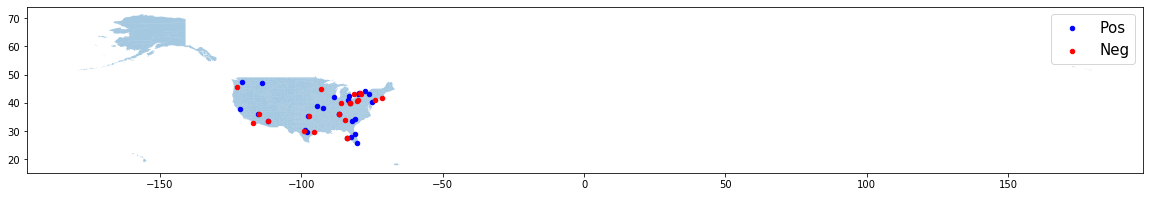

In [68]:
# use shapely by US County
fig,ax = plt.subplots(figsize = (20,20))
street_map.plot(ax=ax, alpha=0.4)
geo_df[geo_df['NBsentiment']==1].plot(ax=ax, markersize = 20, color = "blue", marker ="o", label = "Pos")
geo_df[geo_df['NBsentiment']==0].plot(ax=ax, markersize = 20, color = "red", marker ="o", label = "Neg")

plt.legend(prop = {'size': 15})

In [69]:
#plot for visualization: based on lat & lon and polarity
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon

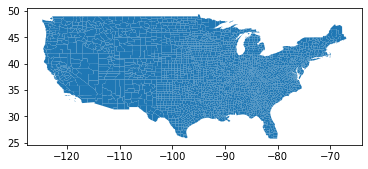

In [70]:
from matplotlib import pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import rtree

# bounding box for continental US
bbox = [-129.7265625,25.799891182088334,-66.4453125,49.49667452747045]

# Rectangles from bbox
p1 = Point(bbox[0], bbox[3])
p2 = Point(bbox[2], bbox[3])
p3 = Point(bbox[2], bbox[1])
p4 = Point(bbox[0], bbox[1])

# x-coor & y-coor

np1 = (p1.coords.xy[0][0], p1.coords.xy[1][0])
np2 = (p2.coords.xy[0][0], p2.coords.xy[1][0])
np3 = (p3.coords.xy[0][0], p3.coords.xy[1][0])
np4 = (p4.coords.xy[0][0], p4.coords.xy[1][0])

# define polygon from the points above
bb_polygon = Polygon([np1, np2, np3, np4])

# make a df
df2 = gpd.GeoDataFrame(gpd.GeoSeries(bb_polygon), columns=['geometry'])

# overlay
intersections2 = gpd.overlay(df2, street_map, how='intersection')
#intersections3 = gpd.overlay(geo_df,df2, how='intersection')

plt.ion()
intersections2.plot()

In [71]:
# Total Positive sentiments
geo_df[geo_df['NBsentiment']==1].count()

text           27
latitude       27
longitude      27
sentiment      27
geometry       27
NBsentiment    27
dtype: int64

In [72]:
# Total Negative sentiments
geo_df[geo_df['NBsentiment']==0].count()

text           22
latitude       22
longitude      22
sentiment      22
geometry       22
NBsentiment    22
dtype: int64

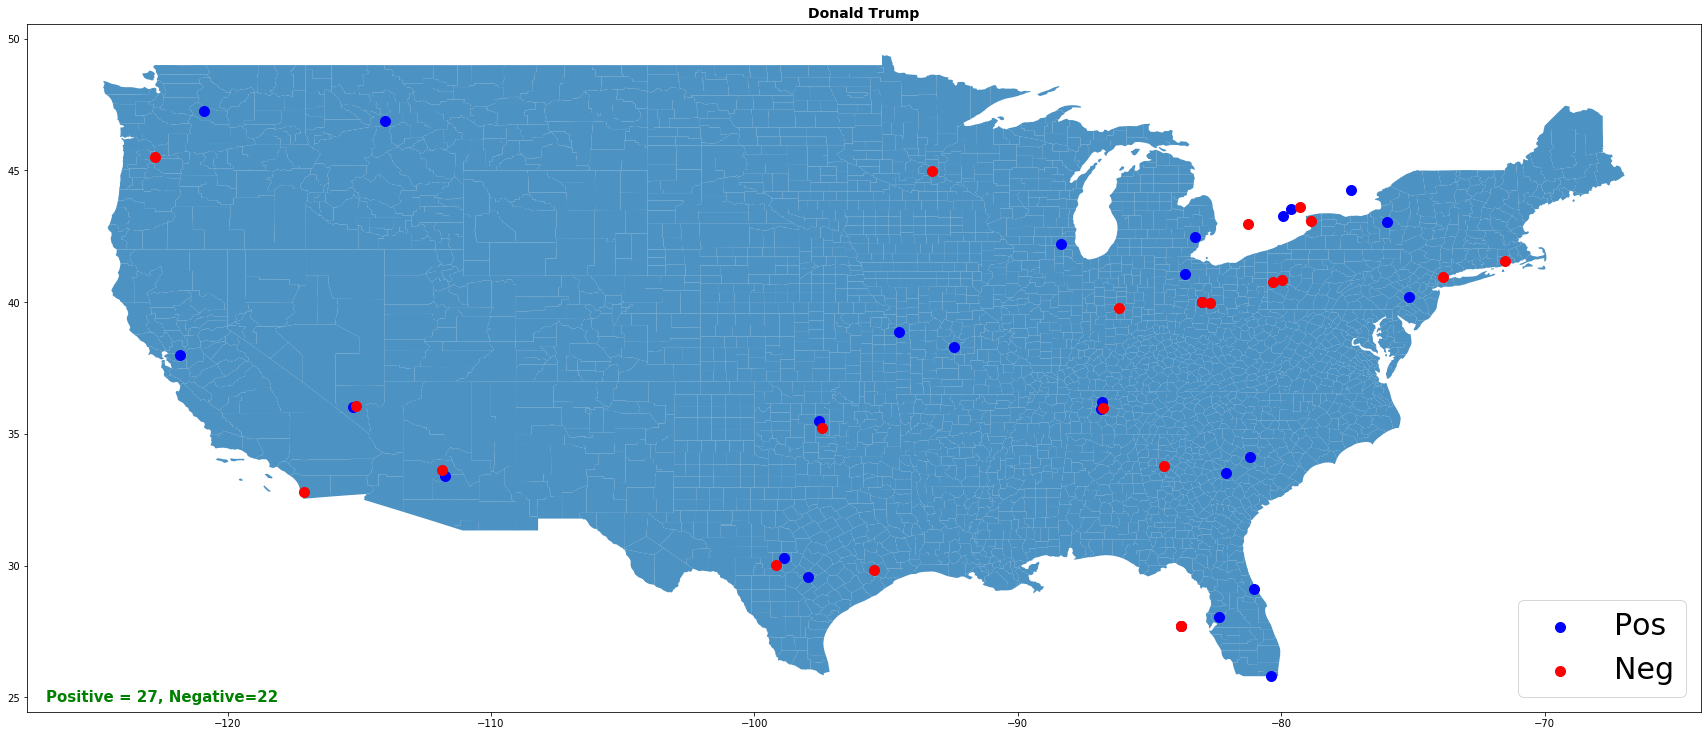

In [74]:
fig,ax = plt.subplots(figsize = (30,30))
intersections2.plot(ax=ax, alpha=0.8)
plt.title('Donald Trump', fontsize=14, fontweight='bold')
ax.text(0.15, 0.01, 'Positive = '+ str(geo_df[geo_df['NBsentiment']==1]['NBsentiment'].count()) + ', Negative='+ str(geo_df[geo_df['NBsentiment']==0]['NBsentiment'].count()),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15, fontweight='bold')
geo_df[geo_df['NBsentiment']==1].plot(ax=ax, markersize = 100, color = "blue", marker ="o", label = "Pos")
geo_df[geo_df['NBsentiment']==0].plot(ax=ax, markersize = 100, color = "red", marker ="o", label = "Neg")

plt.legend(prop = {'size': 30}, loc='lower right')
plt.savefig("img/Sentiment_NB_Donald_Trump.png", bbox_inches='tight', pad_inches=2)

### Another Model: Stochastic Gradient Descent. We repeat the modelling process and check for accuracy again.

### The following train & test dataset was obtained from : https://datahack.analyticsvidhya.com/contest/practice-problem-twitter-sentiment-analysis/

#####  Bag of words model splits the words in a piece of text into tokens disregarding grammar and word order. The model also counts the frequency in which a word occurs in the text, and assigns a weight proportional to this frequency. The output is a matrix of term frequencies where each row represents the text and each column a word in the vocabulary. Sci-kit learn has a number of built in functions to perform this type of modelling. One of it is CountVectoriser. We need  another scikit-learn function called TfidfTransformer to apply the frequency weighting.

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
pipeline_sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('nb', SGDClassifier()),
])

In [76]:
# only using the default settings
print(pipeline_sgd['nb'])

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [77]:
# test & train
train = pd.read_csv('train.csv')
print("Training Set:"% train.columns, train.shape, len(train))
test = pd.read_csv('test_tweets.csv')
print("Test Set:"% test.columns, test.shape, len(test))

Training Set: (31962, 3) 31962
Test Set: (17197, 2) 17197


In [78]:
# a function to clean the data with regular expression
import re
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower() # lowercase
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem)) #removing unwanted characters 
    #df[text_field]= df[text_field].apply(lambda elem: ' '.join([item for item in elem.split() if item not in sw])) # removing stopwords

    return df
test_clean = clean_text(test, "tweet")
train_clean = clean_text(train, "tweet")

In [79]:
#  fit the model to the training data and computes the F1 score.
model = pipeline_sgd.fit(X_train, y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test, y_predict)

0.9696

In [80]:
print('accuracy score: ',accuracy_score(y_test, y_predict))
print('\n')
print('confusion matrix: \n',confusion_matrix(y_test,y_predict))
print('\n')
print(classification_report(y_test, y_predict))

accuracy score:  0.9693135935397039


confusion matrix: 
 [[7132  358]
 [  98 7272]]


              precision    recall  f1-score   support

           0       0.99      0.95      0.97      7490
           1       0.95      0.99      0.97      7370

    accuracy                           0.97     14860
   macro avg       0.97      0.97      0.97     14860
weighted avg       0.97      0.97      0.97     14860



#### This model also scores 96%.

In [81]:
# predicting the sentiment of the tweets
y_preds = model.predict(geo_df['text'])

In [82]:
# creating a new column with a new prediction with SGD
geo_df['SGDsentiment'] = y_preds

In [83]:
# new column created
geo_df.head()

,text,latitude,longitude,sentiment,geometry,NBsentiment,SGDsentiment
0,Notice nun of them have a real plan to help Am...,36.018805,-115.234435,positive,POINT (-115.23444 36.01880),1,1
1,@_Gun_Lover You support Donald 'ban the bump s...,39.960701,-82.718381,negative,POINT (-82.71838 39.96070),0,0
2,“I talked to somebody from the Bloomberg campa...,39.994684,-82.985772,negative,POINT (-82.98577 39.99468),1,0
3,“F**k Donald Trump. We have a voice too. We wi...,37.985661,-121.796444,negative,POINT (-121.79644 37.98566),1,1
4,@realDonaldTrump You are the man President Don...,29.574387,-97.973779,negative,POINT (-97.97378 29.57439),1,1


In [84]:
geo_df['text'][0]
# verify text for positive or negative sentiment

'Notice nun of them have a real plan to help Americans   Only President Trump and he helps AMERICA'

In [85]:
geo_df['text'][1]
# verify text for positive or negative sentiment

"@_Gun_Lover You support Donald 'ban the bump stock, take the weapons, worry about due process later' Trump? Are you… https://t.co/6PWAdI41fm"

In [86]:
geo_df['text'][2]
# verify text for positive or negative sentiment

'“I talked to somebody from the Bloomberg campaign, they said they’re hiring an expert on narcissism and combining t… https://t.co/LXazh7fB7H'

In [87]:
geo_df['text'][3]
# verify text for positive or negative sentiment

'“F**k Donald Trump. We have a voice too. We will speak. And we will be heard” - Nipsey Hustle #Biden #Biden2020… https://t.co/j1Feez0bEG'

In [88]:
# Total Positive sentiments
geo_df[geo_df['SGDsentiment']==1].count()

text            25
latitude        25
longitude       25
sentiment       25
geometry        25
NBsentiment     25
SGDsentiment    25
dtype: int64

In [89]:
# Total Positive sentiments
geo_df[geo_df['SGDsentiment']==0].count()

text            24
latitude        24
longitude       24
sentiment       24
geometry        24
NBsentiment     24
SGDsentiment    24
dtype: int64

### Use Shapely again to plot the latitude & longitude

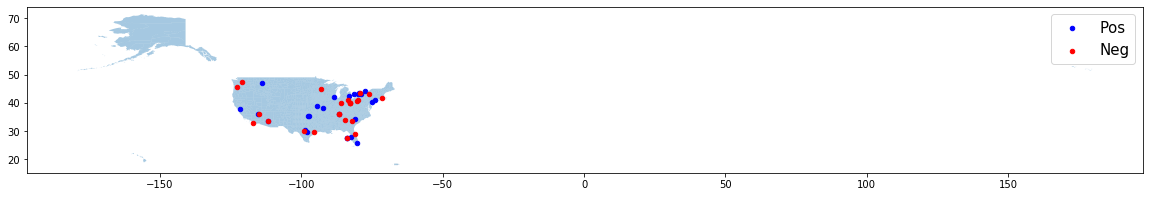

In [90]:
# use shapely by US County
fig,ax = plt.subplots(figsize = (20,20))
street_map.plot(ax=ax, alpha=0.4)
geo_df[geo_df['SGDsentiment']==1].plot(ax=ax, markersize = 20, color = "blue", marker ="o", label = "Pos")
geo_df[geo_df['SGDsentiment']==0].plot(ax=ax, markersize = 20, color = "red", marker ="o", label = "Neg")

plt.legend(prop = {'size': 15})

In [91]:
#plot for visualization: based on lat & lon and polarity
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon

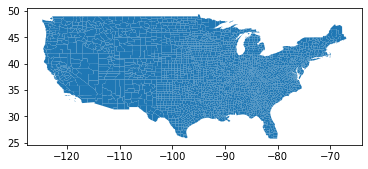

In [92]:
from matplotlib import pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import rtree

# bounding box for continental US
bbox = [-129.7265625,25.799891182088334,-66.4453125,49.49667452747045]

# Rectangles from bbox
p1 = Point(bbox[0], bbox[3])
p2 = Point(bbox[2], bbox[3])
p3 = Point(bbox[2], bbox[1])
p4 = Point(bbox[0], bbox[1])

# x-coor & y-coor

np1 = (p1.coords.xy[0][0], p1.coords.xy[1][0])
np2 = (p2.coords.xy[0][0], p2.coords.xy[1][0])
np3 = (p3.coords.xy[0][0], p3.coords.xy[1][0])
np4 = (p4.coords.xy[0][0], p4.coords.xy[1][0])

# define polygon from the points above
bb_polygon = Polygon([np1, np2, np3, np4])

# make a df
df2 = gpd.GeoDataFrame(gpd.GeoSeries(bb_polygon), columns=['geometry'])

# overlay
intersections2 = gpd.overlay(df2, street_map, how='intersection')
#intersections3 = gpd.overlay(geo_df,df2, how='intersection')

plt.ion()
intersections2.plot()

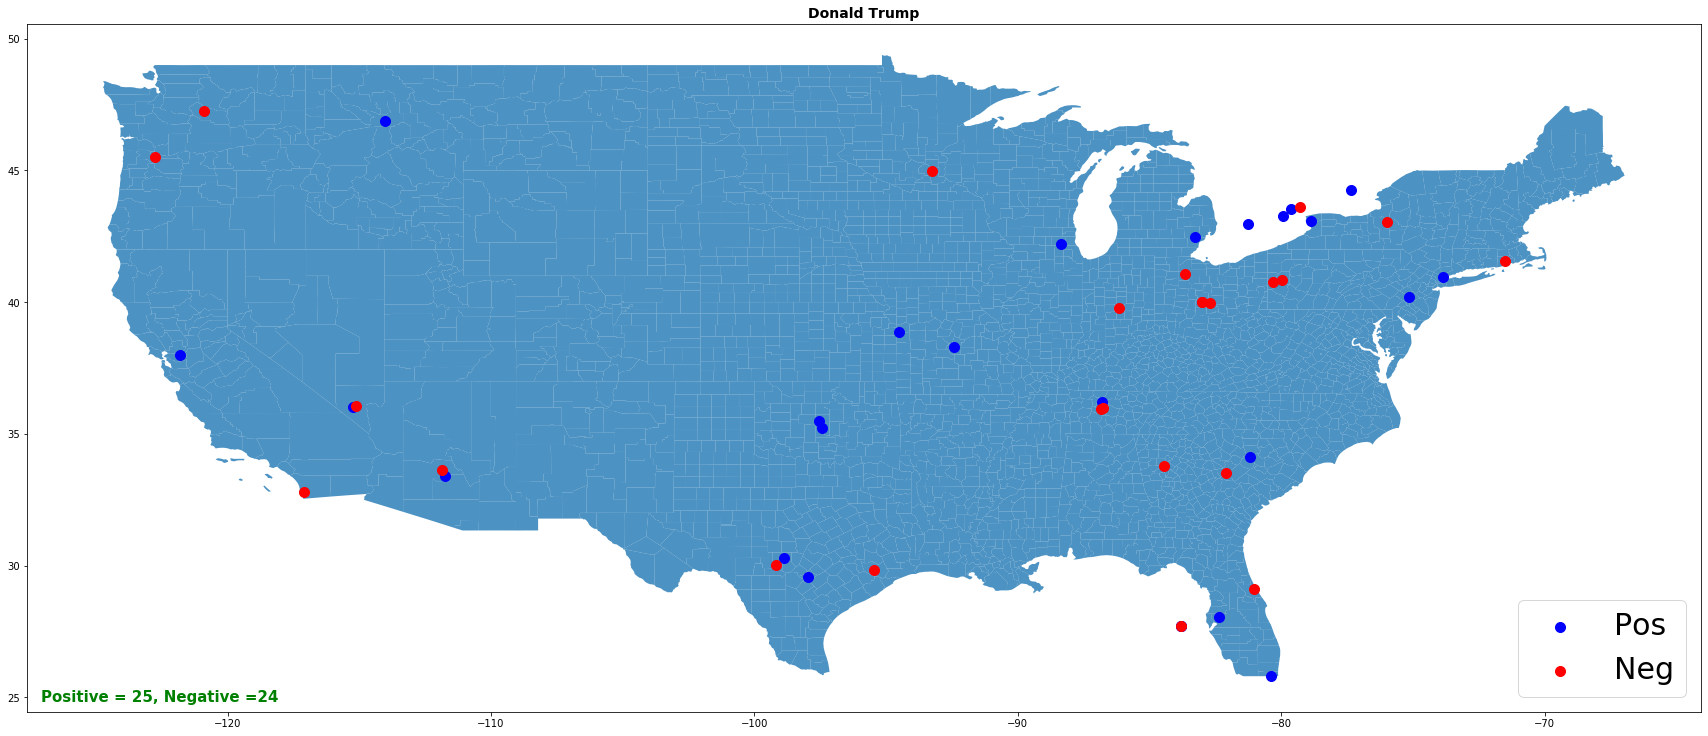

In [93]:
fig,ax = plt.subplots(figsize = (30,30))
intersections2.plot(ax=ax, alpha=0.8)
plt.title('Donald Trump', fontsize=14, fontweight='bold')
ax.text(0.15, 0.01, 'Positive = '+ str(geo_df[geo_df['SGDsentiment']==1]['SGDsentiment'].count()) + ', Negative ='+ str(geo_df[geo_df['SGDsentiment']==0]['SGDsentiment'].count()),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15, fontweight='bold')
geo_df[geo_df['SGDsentiment']==1].plot(ax=ax, markersize = 100, color = "blue", marker ="o", label = "Pos")
geo_df[geo_df['SGDsentiment']==0].plot(ax=ax, markersize = 100, color = "red", marker ="o", label = "Neg")

plt.legend(prop = {'size': 30}, loc='lower right')
plt.savefig("img/Sentiment_Donald_Trump_SGDModel.png", bbox_inches='tight', pad_inches=2)

### We can also visualize the tweets with T-SNE Clustering

In [ ]:
# Code below taken and modified from: https://www.kaggle.com/ahmedsmara/visualizing-word-embedding-using-t-sne

In [94]:
from gensim.models import word2vec

In [95]:
# Create corpus
corpus=[]

for i in range(len(train['tweet'])):
    #print(geo_df['text'][i].split(" "))
    corpus.append(train['tweet'][i].split(" "))

In [96]:
# Word 2 Vec
sne_model = word2vec.Word2Vec(corpus, size=10, window=10, min_count=1, workers=4)

In [97]:
labels = []
tokens = []

for word in sne_model.wv.vocab:
    tokens.append(sne_model[word])
    labels.append(word)

C:\Users\subrag\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [98]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

for i in range(len(train['tweet'])):
    #print(labels[i])
    if(train['label'][i] == 1):
        for word in train['tweet'][i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in train['tweet'][i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

pos_neg_ratios = Counter()

for term,cnt in list(total_counts.most_common()):
    if(cnt >= 10):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio + 0.01)))

In [99]:
# T=SNE Clustering
# create a vector list

import matplotlib.colors as colors

words_to_visualize = list()
for word, ratio in pos_neg_ratios.most_common(500):
    #if(word in mlp.word2index.keys()):
        words_to_visualize.append(word)
    
for word, ratio in list(reversed(pos_neg_ratios.most_common()))[0:500]:
    #if(word in mlp.word2index.keys()):
        words_to_visualize.append(word)

In [100]:
pos = 0
neg = 0

colors_list = list()
vectors_list = list()
for word in words_to_visualize:
    if word in pos_neg_ratios.keys():
        vectors_list.append(sne_model.wv[word])
        #vectors_list.append(pos_neg_ratios[word])
        if(pos_neg_ratios[word] > 0):
            pos+=1
            #colors_list.append("#00ff00")
            colors_list.append("blue")
        else:
            neg+=1
            #colors_list.append("#000000")
            colors_list.append("red")

In [101]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=23, perplexity = 40, init='pca', n_iter = 2500)
words_top_ted_tsne = tsne.fit_transform(vectors_list)
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file

In [102]:
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="vector T-SNE for most polarized words")

source = ColumnDataSource(data=dict(x1=words_top_ted_tsne[:,0],
                                    x2=words_top_ted_tsne[:,1],
                                    names=words_to_visualize,
                                    color=colors_list))

p.scatter(x="x1", y="x2", size=8, source=source, fill_color="color")
#plt.figure(figsize=(30, 20), dpi=80)

word_labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(word_labels)

show(p)

# blue indicates positive words, red indicates negative words

### Conclusion: There are many other models besides bag of words for processing the text data that may work better. There is more work that could be done with the re library to further clean the data, and perhaps the removal of stop words may help to improve the model further.